## Sequential Model

In [1]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
input1 = Input(shape=(5,))

hidden1 = Dense(5, activation='relu')(input1)
hidden2 = Dense(10, activation='relu')(hidden1)
hidden3 = Dense(50, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)

model = Model(inputs=input1, outputs=output)

W0618 06:11:13.568376 140318092367744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 06:11:13.621626 140318092367744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 06:11:13.629756 140318092367744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [3]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________
None


https://keras.io/visualization/    

In [0]:
# pip install pydot

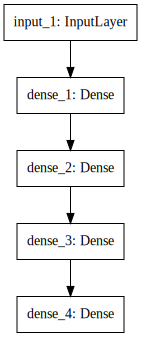

In [4]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Shared Input Layer

In [6]:
# Shared Input Layer

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

# input layer
input1 = Input(shape=(64,64,1))

conv1 = Conv2D(16, kernel_size=2, activation='relu')(input1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
flat1 = Flatten()(pool1)

conv2 = Conv2D(8, kernel_size=4, activation='relu')(input1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)

merge = concatenate([flat1, flat2])

# Adding hidden layer
hidden1 = Dense(10, activation='relu')(merge)

# prediction output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=input1, outputs=output)

# summarize layers
print(model.summary())


W0618 06:11:43.504847 140318092367744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 63, 63, 16)   80          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 61, 61, 8)    136         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 31, 31, 16)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
max_poolin

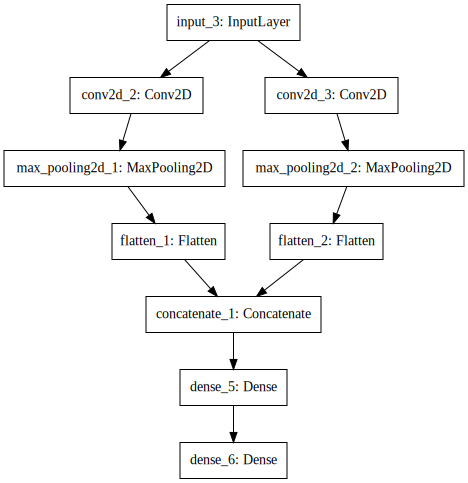

In [7]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Shared Middle Layer


In [8]:
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate

# define input
input1 = Input(shape=(100,1))
# feature extraction
extract1 = LSTM(10)(input1)

# first extract
interp1 = Dense(10, activation='relu')(extract1)

# second extract model
interp11 = Dense(10, activation='relu')(extract1)
interp12 = Dense(20, activation='relu')(interp11)
interp13 = Dense(10, activation='relu')(interp12)

merge = concatenate([interp1, interp13])

# output
output = Dense(1, activation='sigmoid')(merge)
model = Model(inputs=input1, outputs=output)

# summarize layers
print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 100, 1)       0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 10)           480         input_4[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 10)           110         lstm_1[0][0]                     
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 20)           220         dense_8[0][0]                    
__________________________________________________________________________________________________
dense_7 (D

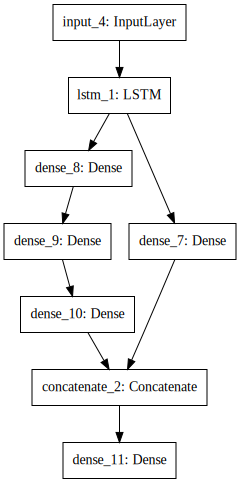

In [9]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Multiple Inputs

In [12]:
# First Input
input1 = Input(shape=(64,64,1))   # B&W image
conv11 = Conv2D(32, kernel_size=4, activation='relu')(input1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)

# Next Input
input2 = Input(shape=(32,32,3))   # COLOR IMAGE
conv21 = Conv2D(32, kernel_size=4, activation='relu')(input2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)

# merge input models
merge = concatenate([flat1, flat2])

# Adding Dense layers
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=[input1, input2], outputs=output)

# summarize layers
print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 61, 61, 32)   544         input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 29, 29, 32)   1568        input_9[0][0]                    
__________________________________________________________________________________________________
max_poolin

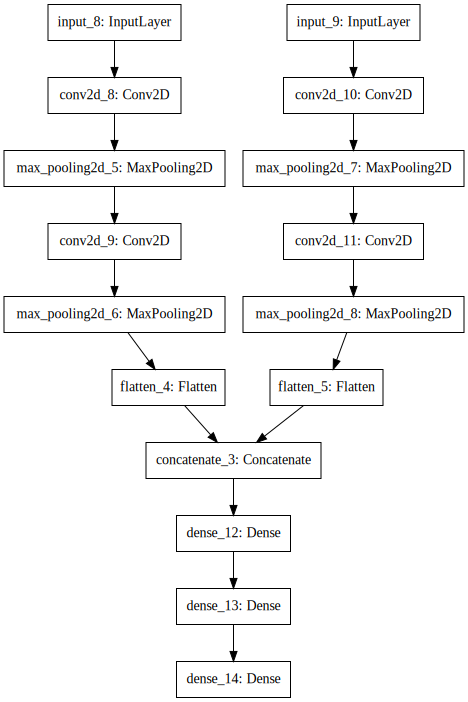

In [13]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))